# Final Project Descriptive Analysis
Alex Mueggenberg and Sebastian Riosf

In [1]:
#reading in the data
import pandas as pd
merged_cleaned = pd.read_csv('PL_final_df.csv', index_col = 0)

In [3]:
# Checking column names
print(merged_cleaned.columns.tolist())

['Player', 'Weekly Salary', 'Annual Salary', 'Team', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1', 'G+A', 'G-PK.1', 'G+A-PK', 'xG', 'npxG', 'xA', 'npxG+xA', 'xG.1', 'xA.1', 'xG+xA', 'npxG.1', 'npxG+xA.1', 'Played', 'Won', 'Drawn', 'Lost', 'Goals For', 'Goals Against', 'Goal Difference', 'Points', 'Performance Score', 'Goals_per_1k', 'xG_per_1k', 'Assists_per_1k', 'G+A_per_1k']


### Univariate Analysis
Do top-paid players justify their wages with top performance?:
Univariate Analysis: Starting with Salary distribution and Goals scored distribution

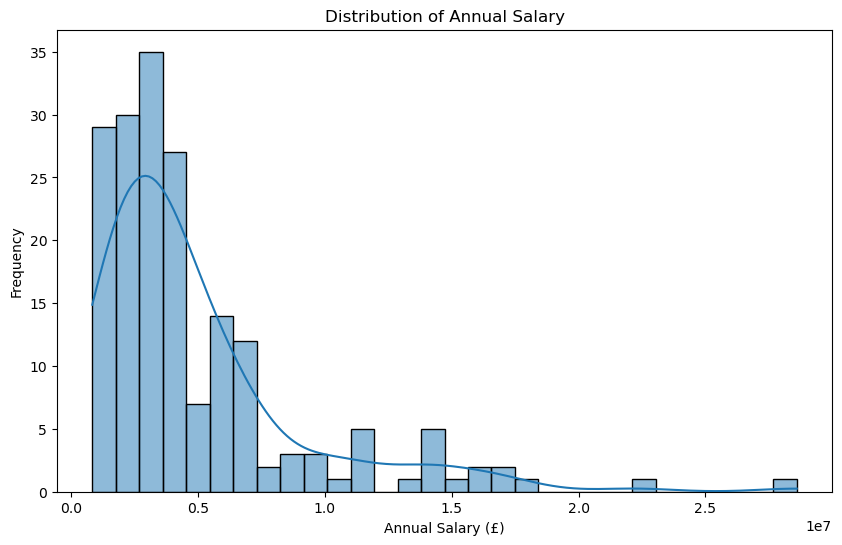

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for Annual Salary
plt.figure(figsize=(10, 6))
sns.histplot(merged_cleaned['Annual Salary'], bins=30, kde=True)
plt.title('Distribution of Annual Salary')
plt.xlabel('Annual Salary (£)')
plt.ylabel('Frequency')
plt.show()

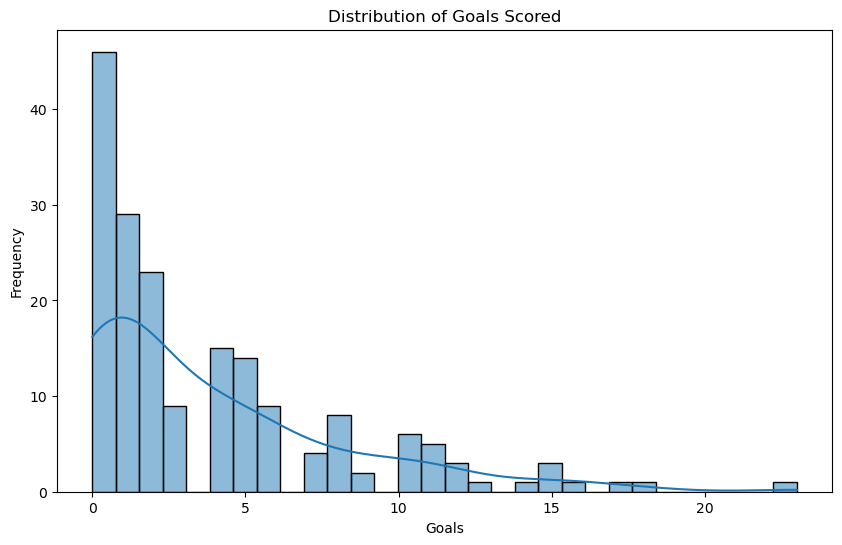

In [9]:
# Plot histogram for Goals (Gls)
plt.figure(figsize=(10, 6))
sns.histplot(merged_cleaned['Gls'], bins=30, kde=True)
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

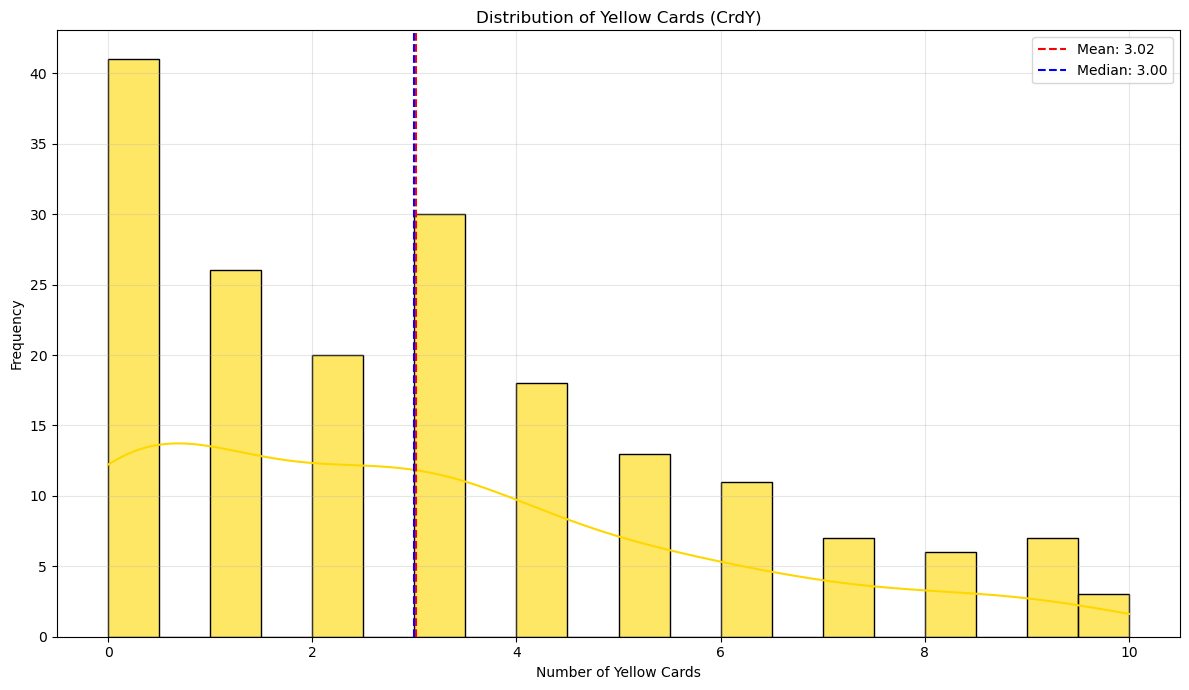

Mean Yellow Cards: 3.0164835164835164
Median Yellow Cards: 3.0
Standard Deviation of Yellow Cards: 2.703538247877742


In [11]:
# Plot Histogram of Yellow cards
plt.figure(figsize=(12, 7))
sns.histplot(merged_cleaned['CrdY'], bins=20, kde=True, color='gold', alpha=0.6)
plt.axvline(merged_cleaned['CrdY'].mean(), color='red', linestyle='--', linewidth=1.5, label=f"Mean: {merged_cleaned['CrdY'].mean():.2f}")
plt.axvline(merged_cleaned['CrdY'].median(), color='blue', linestyle='--', linewidth=1.5, label=f"Median: {merged_cleaned['CrdY'].median():.2f}")
plt.title('Distribution of Yellow Cards (CrdY)')
plt.xlabel('Number of Yellow Cards')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Display basic statistics
crdy_mean = merged_cleaned['CrdY'].mean()
crdy_median = merged_cleaned['CrdY'].median()
crdy_std = merged_cleaned['CrdY'].std()

print(f"Mean Yellow Cards: {crdy_mean:}")
print(f"Median Yellow Cards: {crdy_median:}")
print(f"Standard Deviation of Yellow Cards: {crdy_std:}")

### Bivariate Analysis
The scatter plot visually explores whether higher-paid players are performing better.
The correlation coefficient displays the strength and direction of the relationship:

Near 1 = strong positive correlation,
Near 0 = no linear correlation,
Near -1 = strong negative correlation

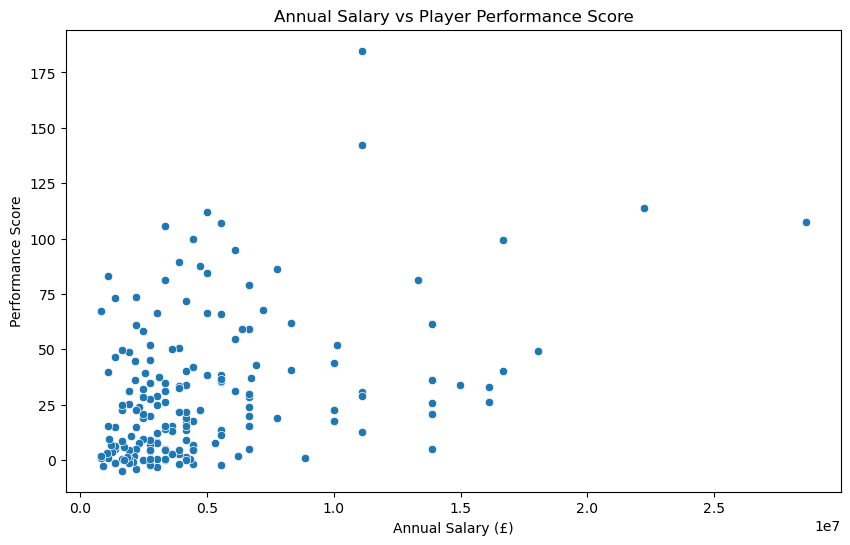

Correlation between Salary and Performance Score: 0.4003380105372966


In [13]:
# Scatter plot: Annual Salary vs Performance Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_cleaned, x='Annual Salary', y='Performance Score')
plt.title('Annual Salary vs Player Performance Score')
plt.xlabel('Annual Salary (£)')
plt.ylabel('Performance Score')
plt.show()

# Correlation between salary and performance
salary_perf_corr = merged_cleaned[['Annual Salary', 'Performance Score']].corr()
print(f"Correlation between Salary and Performance Score: {salary_perf_corr.iloc[0,1]}")

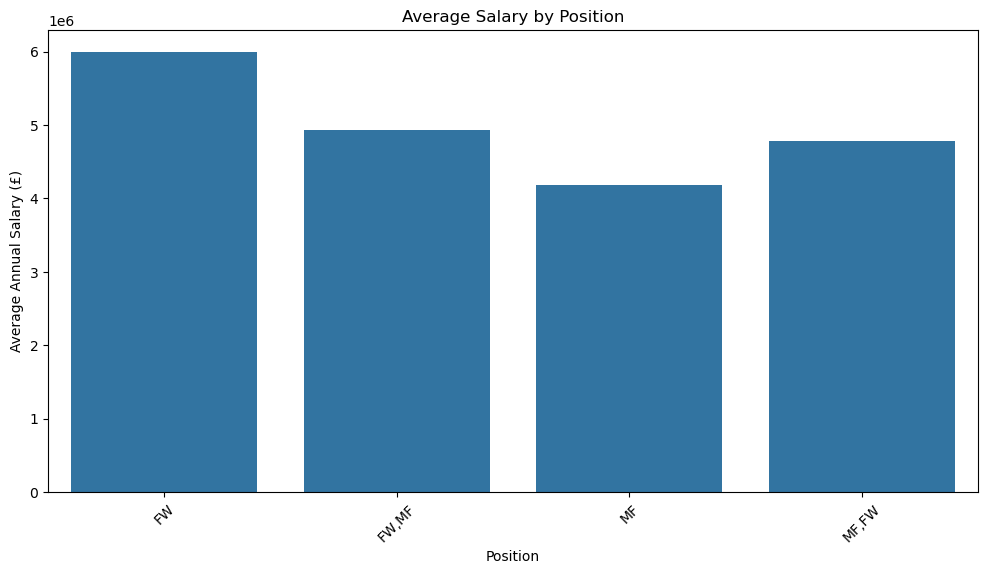

In [15]:
# Q4 Reference: Positional salary analysis
# Bar plot: Average Salary by Position
plt.figure(figsize=(12, 6))
avg_salary_by_position = merged_cleaned.groupby('Pos')['Annual Salary'].mean().reset_index()
sns.barplot(x='Pos', y='Annual Salary', data=avg_salary_by_position)
plt.title('Average Salary by Position')
plt.xlabel('Position')
plt.ylabel('Average Annual Salary (£)')
plt.xticks(rotation=45)
plt.show()

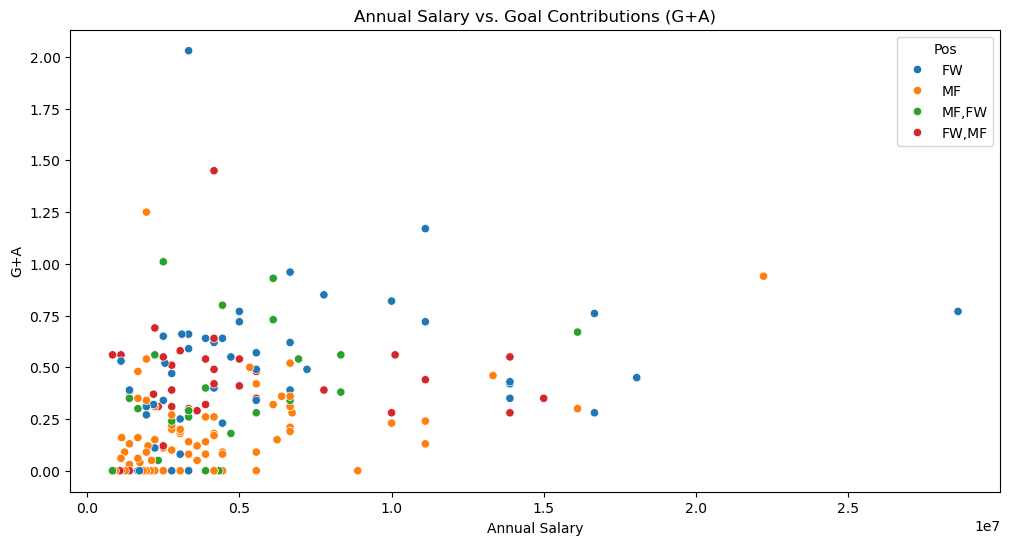

In [17]:
# Plotting Annaul Salary vs Goal Contributions (G+A)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_cleaned, x='Annual Salary', y='G+A', hue='Pos')
plt.title('Annual Salary vs. Goal Contributions (G+A)')
plt.show()

In [19]:
#Q3 Reference: Performance per £1K value analysis
#Top Players by Goals_per_1k and xG_per_1k
print("Top Value Players by Goals per £1k:")
top_value = merged_cleaned[['Player', 'Goals_per_1k', 'xG_per_1k', 'Annual Salary']].sort_values(by='Goals_per_1k', ascending=False)
top_value.head(10)

Top Value Players by Goals per £1k:


,Player,Goals_per_1k,xG_per_1k,Annual Salary
176,Emmanuel Dennis,0.012005,0.009004,832993
169,Ivan Toney,0.010804,0.010804,1110657
163,Teemu Pukki,0.007923,0.008283,1388322
168,Yoane Wissa,0.006303,0.003331,1110657
155,Conor Gallagher,0.004802,0.003481,1665986
133,Emile Smith Rowe,0.004502,0.002611,2221315
98,Jarrod Bowen,0.003601,0.003331,3331972
162,Demarai Gray,0.003601,0.003241,1388322
111,Maxwel Cornet,0.003241,0.002413,2776643
120,Callum Wilson,0.003132,0.002545,2554512


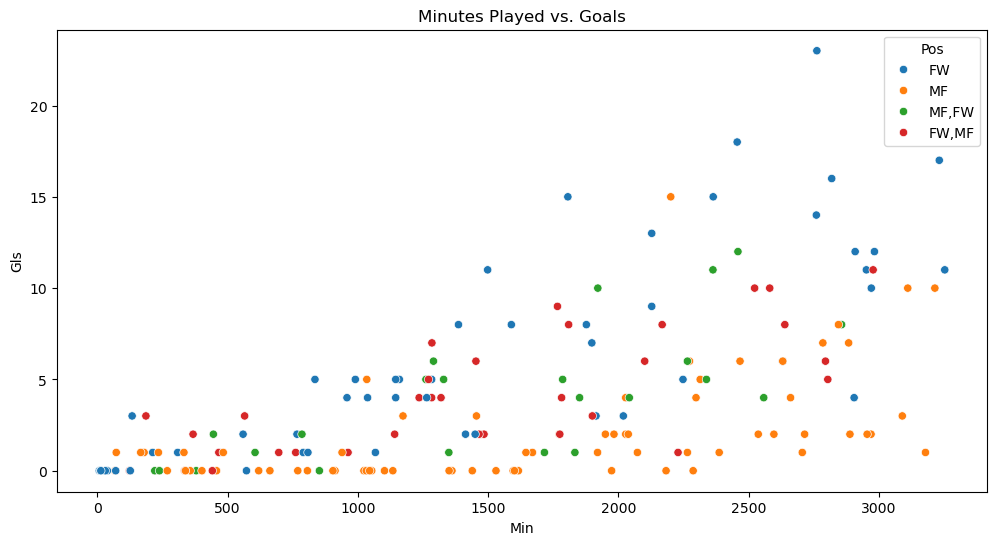

In [21]:
#Q5 Reference: Playing time vs perfomance analysis
#Scatter plot: Minutes vs. Goals
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_cleaned, x='Min', y='Gls', hue='Pos')
plt.title('Minutes Played vs. Goals')
plt.show()

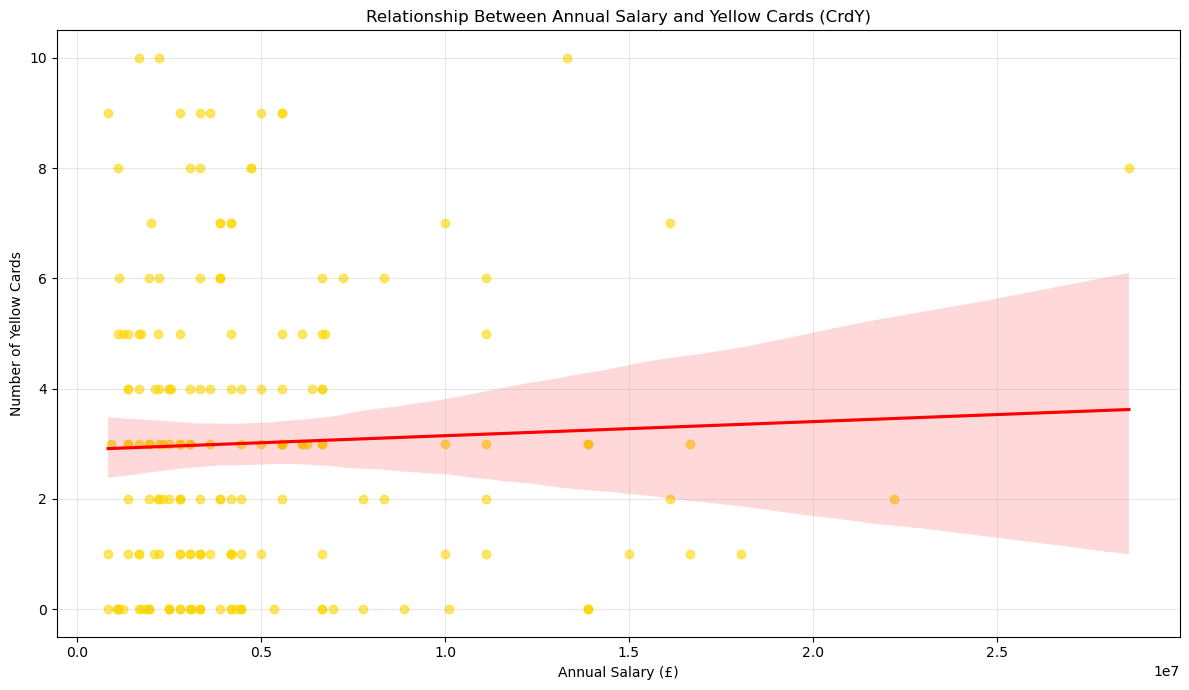

Correlation between Annual Salary and Yellow Cards: 0.04


In [23]:
#Plot Scatter Plot with Regression Line
plt.figure(figsize=(12, 7))
sns.regplot(
    x=merged_cleaned['Annual Salary'], 
    y=merged_cleaned['CrdY'], 
    scatter_kws={'alpha': 0.6, 'color': 'gold'}, 
    line_kws={'color': 'red'}
)
plt.title('Relationship Between Annual Salary and Yellow Cards (CrdY)')
plt.xlabel('Annual Salary (£)')
plt.ylabel('Number of Yellow Cards')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Displaying the Correlation
salary_crdy_corr = merged_cleaned['Annual Salary'].corr(merged_cleaned['CrdY'])
print(f"Correlation between Annual Salary and Yellow Cards: {salary_crdy_corr:.2f}")


### Hypothesis Test: T-test for Salary vs Goals
Question: Do players who make above-median salary score more goals than those below?

Null Hypothesis (H0): Players who earn above the median salary do not score more goals than those earning below the median salary.

Alternative Hypothesis (H1): Players who earn above the median salary score more goals than those earning below the median salary

In [26]:
from scipy.stats import ttest_ind

median_salary = merged_cleaned['Annual Salary'].median()

# Create two groups: Above median salary and below median salary
above_median = merged_cleaned[merged_cleaned['Annual Salary'] > median_salary]
below_median = merged_cleaned[merged_cleaned['Annual Salary'] <= median_salary]

# Perform T-test for Goals (Gls) between the two groups
t_stat, p_value = ttest_ind(above_median['Gls'].dropna(), below_median['Gls'].dropna())
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Players earning above the median salary score significantly more goals.")
else:
    print("Fail to reject the null hypothesis: No significant difference in goals scored based on salary.")
    

T-statistic: 4.560281433930247
P-value: 9.418240930908432e-06
Reject the null hypothesis: Players earning above the median salary score significantly more goals.


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Correlation between Performance Score and G+A_per_1k
correlation, p_value = pearsonr(merged_cleaned['Performance Score'], merged_cleaned['G+A_per_1k'])
print(f"Pearson Correlation between Performance Score and G+A_per_1k: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

#Checking the significance
if p_value < 0.05:
    print("There is a significant relationship between Performance Score and G+A_per_1k.")
else:
    print("There is no significant relationship between Performance Score and G+A_per_1k.")


Pearson Correlation between Performance Score and G+A_per_1k: 0.29
P-value: 0.0001
There is a significant relationship between Performance Score and G+A_per_1k.


### Visualizations

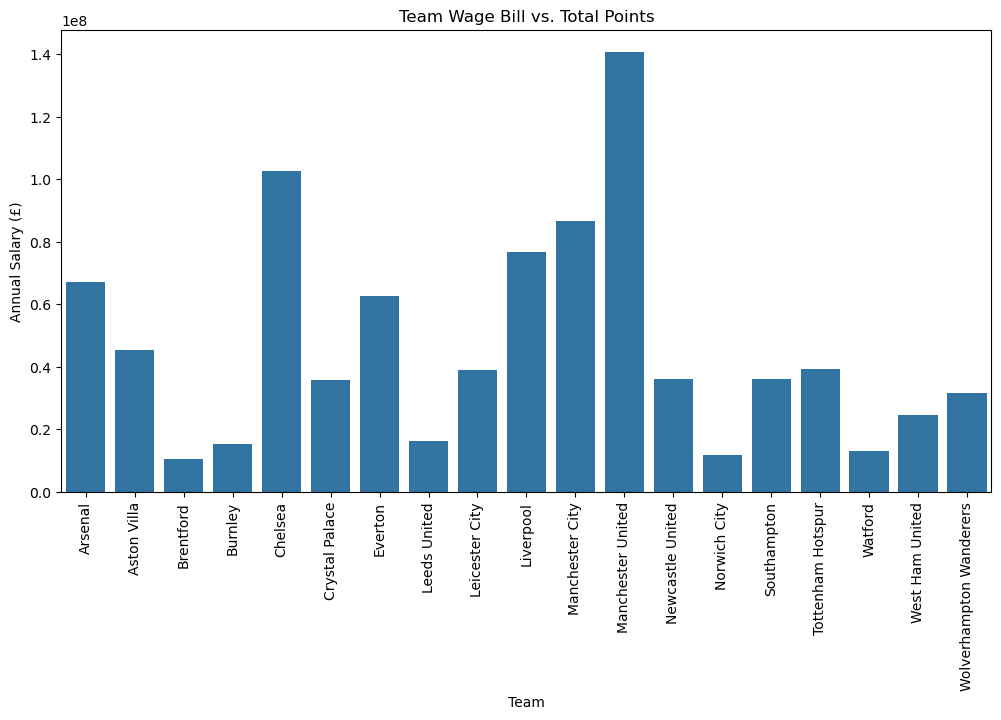

In [31]:
# Bar plot: Team wage bill vs. total points
#Helps look at team success
# Calculate team wage bill (sum of all player salaries in each team)
team_salary = merged_cleaned.groupby('Team')['Annual Salary'].sum().reset_index()

# Calculate total points per team and merge
team_points = merged_cleaned.groupby('Team')['Points'].sum().reset_index()
team_data = pd.merge(team_salary, team_points, on='Team')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Annual Salary', data=team_data)
plt.title('Team Wage Bill vs. Total Points')
plt.xlabel('Team')
plt.ylabel('Annual Salary (£)')
plt.xticks(rotation=90)
plt.show()


In [33]:
#Checking the average wage bill of the teams, this was just a personal check for better understanding of the data
average_wage_bill = team_data['Annual Salary'].mean()
print(average_wage_bill)

46944492.315789476


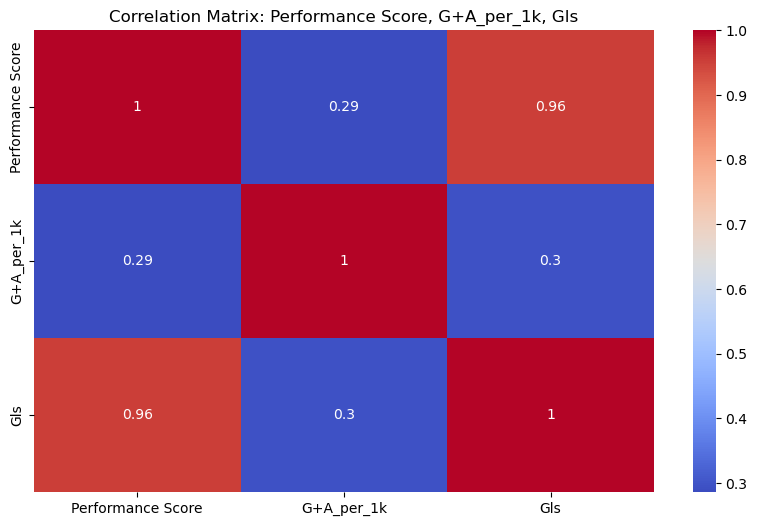

In [35]:
# Visualization: Heatmap of Correlations
# Helps to observe the strength and direction of relationships among the variables
plt.figure(figsize=(10, 6))
correlation_matrix = merged_cleaned[['Performance Score', 'G+A_per_1k', 'Gls']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix: Performance Score, G+A_per_1k, Gls')
plt.show()

### Machine Learning
Using Linear Regression to predict a performance metric like Goals (Gls) based on variables such as Salary, Minutes Played, and xG.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Drop rows with any missing values in features or target
data = merged_cleaned[['Annual Salary', 'MP', 'xG', 'Gls']].dropna()

# Define X and y again based on cleaned data
X = data[['Annual Salary', 'MP', 'xG']]
y = data['Gls']

# Then continue as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.7687553165613763
R-squared: 0.906759174742386


Interpretation of the Machine Learning techique
On average, the squared error between what the model predicts and reality is about 2.77 goals, the lower MSE goes the better.
The features picked (Annual Salary, MP, and xG) are able to explain 91% of the differences in players' real goal totals.

#### Using Linear and Ridge Regression to predict a performance metric like annual salary based on variables such as Goals scored, Minutes Played, and G+A.

In [49]:
#Prepare the data for regression
X = merged_cleaned[['Min', 'xG', 'G+A']]
y = merged_cleaned['Annual Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, lin_pred))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge Regression R²:", r2_score(y_test, ridge_pred))

Linear Regression R²: 0.053524022280116546
Ridge Regression R²: 0.051220417851545186


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Define target: 1 if Performance Score above median, else 0
median_score = merged_cleaned['Performance Score'].median()
merged_cleaned['High_Performance'] = (merged_cleaned['Performance Score'] >= median_score).astype(int)

# Define features and target
X = merged_cleaned[['Goals_per_1k', 'xG_per_1k', 'Assists_per_1k']]
y = merged_cleaned['High_Performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize models
class_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear')
}

#Evaluate classification models
classification_scores = {}
for name, model in class_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    classification_scores[name] = {"Accuracy": acc, "F1 Score": f1}
    print(f"{name} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

# Visualizing the Accuracy and F1 Scores
acc_scores = [classification_scores[model]["Accuracy"] for model in classification_scores]
f1_scores = [classification_scores[model]["F1 Score"] for model in classification_scores]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].barh(list(classification_scores.keys()), acc_scores, color='skyblue')
ax[0].set_title('Accuracy Scores')
ax[0].set_xlabel('Accuracy')
ax[0].grid(alpha=0.3)

ax[1].barh(list(classification_scores.keys()), f1_scores, color='salmon')
ax[1].set_title('F1 Scores')
ax[1].set_xlabel('F1 Score')
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


NameError: name 'LogisticRegression' is not defined

### Time Series Forecasting
It was a little difficult to accomplish, after different attempts with other pieces of data, I found this one to be most interesting. I can see having multiple seasons be useful when it comes to forecasting. 


Aggregated Data by Team:
          Team  Points
0      Arsenal    69.0
1  Aston Villa    45.0
2    Brentford    46.0
3      Burnley    35.0
4      Chelsea    74.0


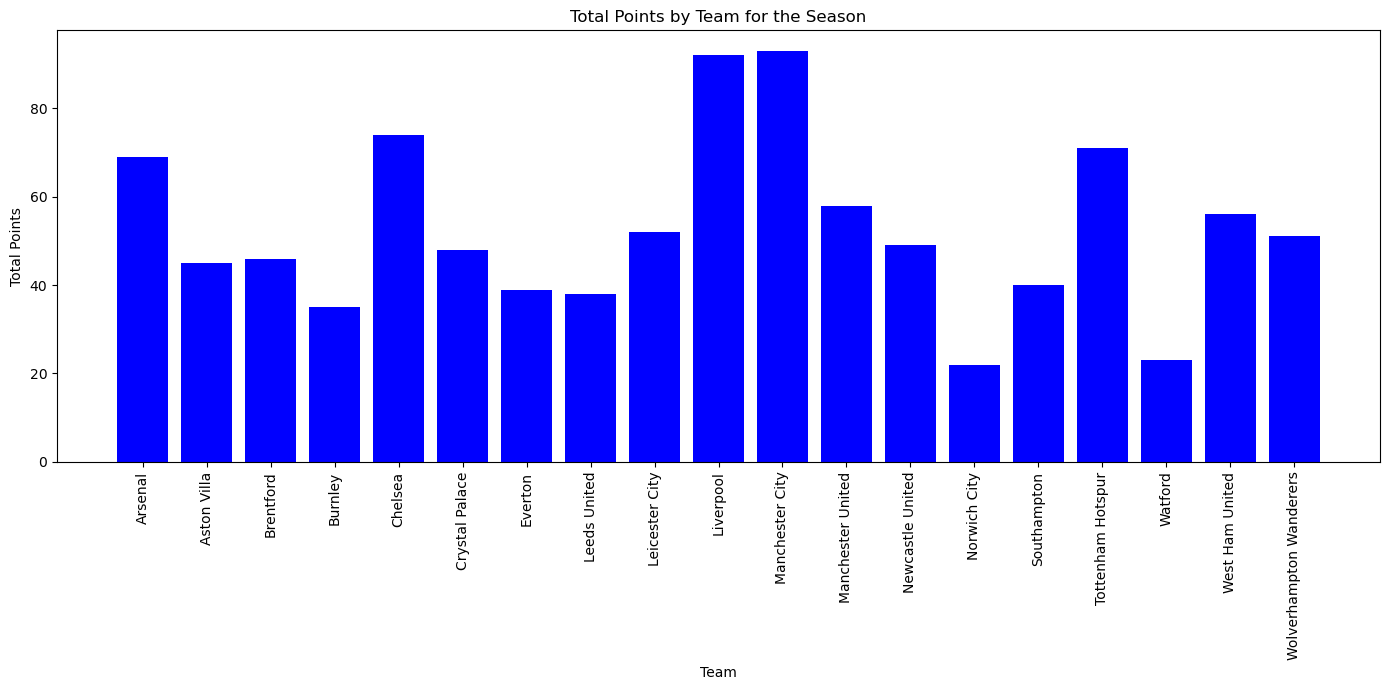

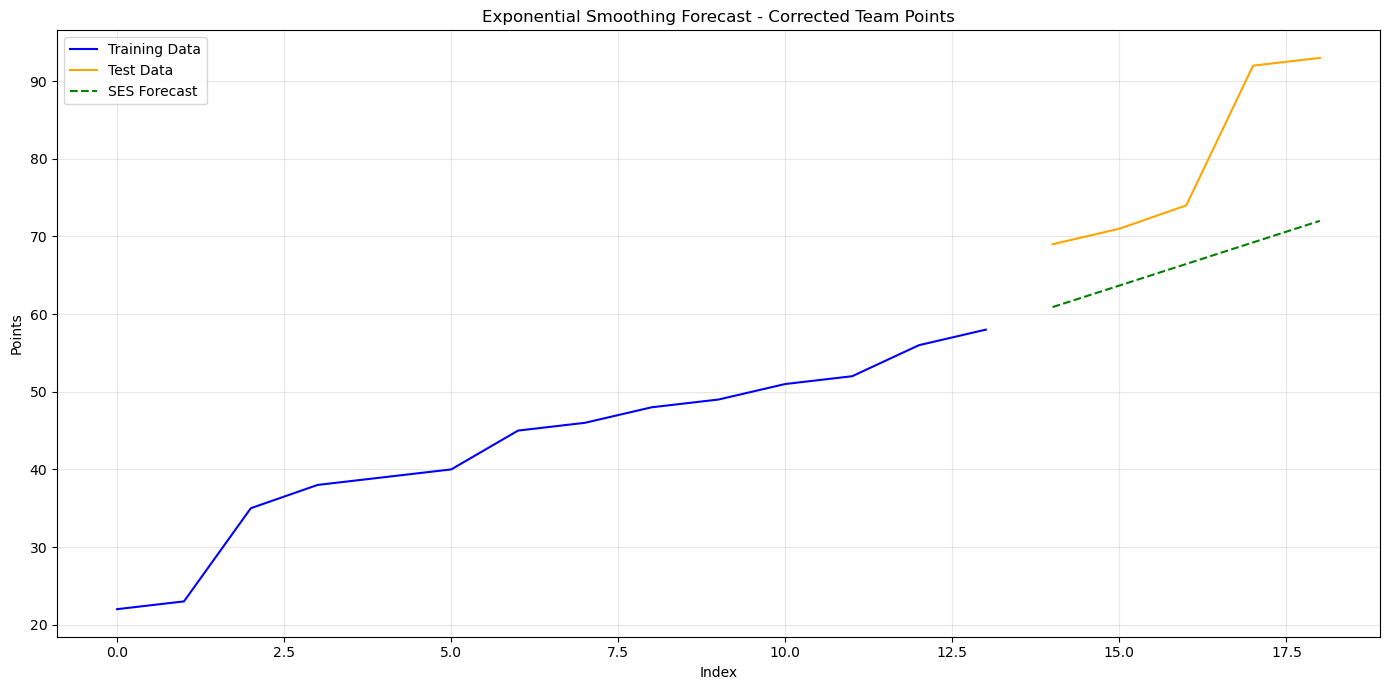

Exponential Smoothing MSE: 226.9536


In [177]:
#Use the maximum points per team (since every player in a team would have the same points value for a match)
team_points = merged_cleaned.groupby('Team')['Points'].max().reset_index()

#Verify the structure
print("\nAggregated Data by Team:")
print(team_points.head())

#Plot the corrected team points data
plt.figure(figsize=(14, 7))
plt.bar(team_points['Team'], team_points['Points'], color='blue')
plt.xticks(rotation=90)
plt.title('Total Points by Team for the Season')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.tight_layout()
plt.show()

#Time Series Forecasting based on Corrected Team Points
#sorting data by points to simulate a sequence
#since the data is sorted by points, the x-axis is the index, meaning it is in ranking of teams from lowest to highest
team_points = team_points.sort_values(by='Points').reset_index(drop=True)

#Extract points as the series
points_series = team_points['Points']
train = points_series[:-5]  # Last 5 as test data
test = points_series[-5:]

#Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_ses = ExponentialSmoothing(train, trend='add', seasonal=None).fit()
pred_ses = model_ses.forecast(len(test))

# Plot the SES predictions
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(test.index, pred_ses, label='SES Forecast', color='green', linestyle='--')
plt.title('Exponential Smoothing Forecast - Corrected Team Points')
plt.xlabel('Index')
plt.ylabel('Points')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate MSE for SES
from sklearn.metrics import mean_squared_error
mse_ses = mean_squared_error(test, pred_ses)
print(f"Exponential Smoothing MSE: {mse_ses:.4f}")
